<a href="https://colab.research.google.com/github/moeinghaeini/Audio-Pattern-Recognition/blob/main/Random_Forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Validation Accuracy: 0.5494
Test Accuracy: 0.5699


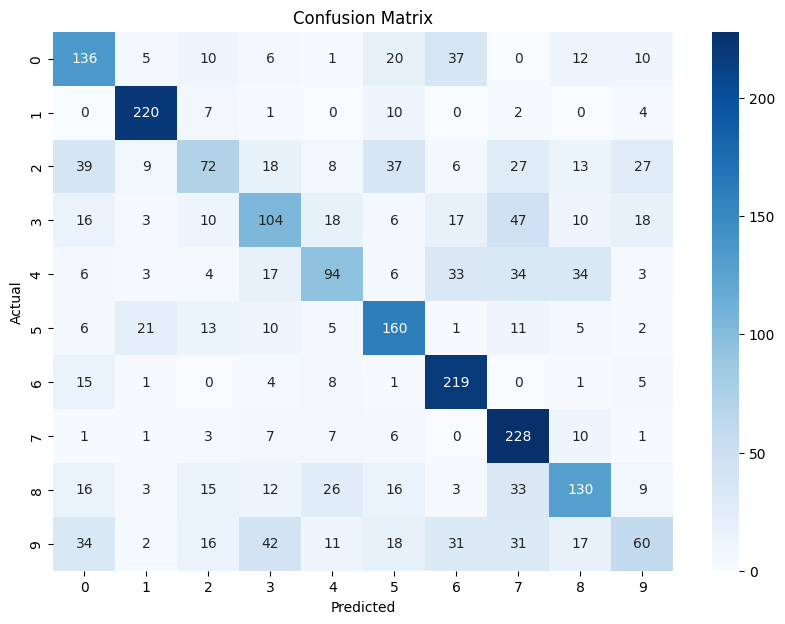

Classification Report:
              precision    recall  f1-score   support

           0     0.5056    0.5738    0.5375       237
           1     0.8209    0.9016    0.8594       244
           2     0.4800    0.2812    0.3547       256
           3     0.4706    0.4177    0.4426       249
           4     0.5281    0.4017    0.4563       234
           5     0.5714    0.6838    0.6226       234
           6     0.6311    0.8622    0.7288       254
           7     0.5521    0.8636    0.6736       264
           8     0.5603    0.4943    0.5253       263
           9     0.4317    0.2290    0.2993       262

    accuracy                         0.5699      2497
   macro avg     0.5552    0.5709    0.5500      2497
weighted avg     0.5543    0.5699    0.5487      2497


Top 10 Most Important Features:
Feature 1638: 0.0018
Feature 858: 0.0019
Feature 923: 0.0019
Feature 962: 0.0020
Feature 1534: 0.0021
Feature 468: 0.0023
Feature 1521: 0.0024
Feature 1599: 0.0026
Feature 819: 0.0029
F

In [ ]:


# Constants
DATA_PATH = "/content/drive/MyDrive/University of Milan/Audio Pattern Recognition/Data.json"

def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """
    # load data
    X, y = load_data(DATA_PATH)

    # Reshape MFCC data for Random Forest (flatten the time series)
    X = X.reshape(X.shape[0], -1)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model():
    """Generates Random Forest model
    :return model: Random Forest model
    """
    # Create Random Forest model with 100 trees
    model = RandomForestClassifier(n_estimators=100,
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 random_state=42)
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluates the model using a Confusion Matrix, Accuracy, Precision, and Recall.
    :param model: Trained Random Forest model
    :param X_test: Test dataset features
    :param y_test: True labels for the test dataset
    """
    # Get model predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

if __name__ == "__main__":
    # Get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # Create and train model
    model = build_model()
    model.fit(X_train, y_train)

    # Evaluate on validation set
    val_accuracy = model.score(X_validation, y_validation)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on test set
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Evaluate model with confusion matrix and classification report
    evaluate_model(model, X_test, y_test)

    # Print feature importances
    feature_importances = model.feature_importances_
    print("\nTop 10 Most Important Features:")
    top_10_indices = np.argsort(feature_importances)[-10:]
    for idx in top_10_indices:
        print(f"Feature {idx}: {feature_importances[idx]:.4f}")